<a href="https://colab.research.google.com/github/PPatrickGU/ROB311/blob/master/TP4_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ROB311 TP4** 

**Implementation of the algorithm of SVM to identify the handwriting number** 

*Author: Yan CHEN & Dajing GU*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import operator

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline

**Data loading**

In [17]:
# Assign the name of the attributes

train_path = "./mnist_train.csv"
test_path = "./mnist_test.csv"

# Read dataset to Dataframe of Pandas
trainset = pd.read_csv(train_path)
testset = pd.read_csv(test_path)

# Display the data
trainset.head()

# Seperate the features and the targets
train_data = trainset.iloc[:, 1:] # Features
train_target = trainset.iloc[:, 0] # Labels

train_size = train_target.shape[0] 

test_data = testset.iloc[:, 1:] # Features
test_target = testset.iloc[:, 0] # Labels

test_size = test_target.shape[0] 

print('train_data size: ', train_data.shape)
print('train_target size: ', train_target.shape)
print(train_size)

train_data size:  (60000, 784)
train_target size:  (60000,)
60000


**Useful function**

In [23]:
# Reference : https://blog.csdn.net/u012193416/article/details/79469770
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
        print("Normalized confusion matrix")
    else:
        title = 'Confusion matrix without normalization'
        print('Confusion matrix without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment='top',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  

def getAccuracy(testSet, predictions):
  correct = 0
  for x in range(testSet.shape[0]):
    if testSet[x] == predictions[x]:
      correct += 1
  return (correct/float(testSet.shape[0])) * 100.0 

**I）A simple implementation of the algorithm**


In [8]:
pca = PCA(n_components=100)

print("data size before PCA:", train_data.shape)
pca.fit(train_data)
train_data_PCA = pca.transform(train_data)
test_data_PCA = pca.transform(test_data)
print('data size after PCA: ' ,train_data_PCA.shape)

data size before PCA: (60000, 784)
data size after PCA:  (60000, 100)


In [9]:
clf = SVC()
clf.fit(train_data_PCA, train_target)
prediction = clf.predict(test_data_PCA)


classification report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


 confusion matrix: 
 [[ 974    0    1    0    0    2    0    1    2    0]
 [   0 1128    3    1    0    1    1    0    1    0]
 [   5    0 1014    0    1    0    1    7    4    0]
 [   0    0    2  996    0    3   

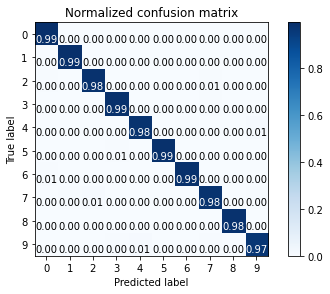

In [29]:
cm = confusion_matrix(test_target, prediction)

print("classification report : \n", classification_report(test_target, prediction))
print("\n confusion matrix: \n", confusion_matrix(test_target, prediction))
print("\n Accuracy: %.2f%% \n" %getAccuracy(test_target, prediction))


class_names = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(cm, classes=class_names, normalize=True)

**II) A better implementation**

classification report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


 confusion matrix: 
 [[ 973    0    1    1    0    0    3    0    2    0]
 [   0 1124    2    1    1    1    2    1    3    0]
 [   2    2 1012    1    1    0    1    5    7    1]
 [   0    0    6  987    0    6   

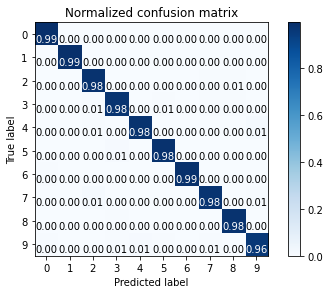

In [30]:
pca = PCA(n_components=100, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, StandardScaler(), svc)
model.fit(train_data, train_target)
prediction = model.predict(test_data)

cm = confusion_matrix(test_target, prediction)

print("classification report : \n", classification_report(test_target, prediction))
print("\n confusion matrix: \n", confusion_matrix(test_target, prediction))
print("\n Accuracy: %.2f%% \n" %getAccuracy(test_target, prediction))

class_names = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(cm, classes=class_names, normalize=True)